In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_pickle('/dsa/groups/casestudy2022su/team05/carscom_v02.pkl') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389785 entries, 0 to 400740
Data columns (total 15 columns):
index                389785 non-null int64
Year                 389785 non-null int64
Make                 389785 non-null object
Model                389785 non-null object
Dealer_Name          389785 non-null object
Distance Radius      389785 non-null int64
Zip                  389785 non-null int64
State                389785 non-null object
City                 389785 non-null object
Mileage              389785 non-null int64
Price                389785 non-null int64
Rate                 389785 non-null object
Under_Value($)       389785 non-null int64
miles                389785 non-null int64
electronic_dealer    389785 non-null int64
dtypes: int64(9), object(6)
memory usage: 47.6+ MB


([<matplotlib.axis.YTick at 0x7f64efc3acc0>,
 <a list of 31 Text yticklabel objects>)

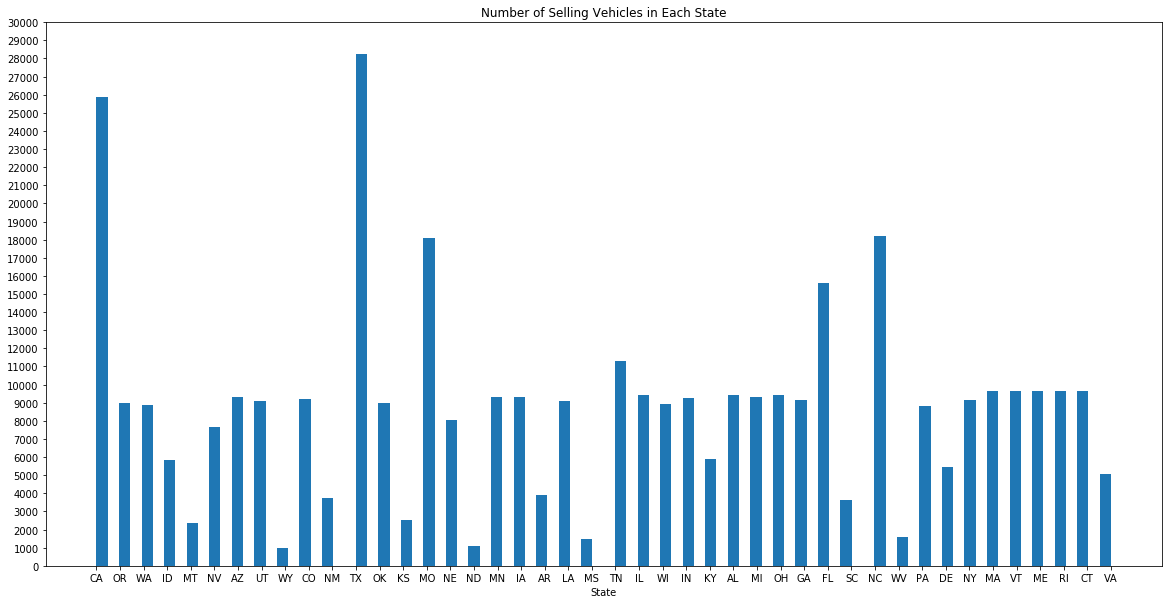

In [24]:
state = df['State']
hist = state.hist(bins = 90, figsize = (20, 10), grid = False)
plt.title('Number of Selling Vehicles in Each State')
plt.xlabel('State')
plt.yticks(np.arange(0,31000,1000))

Text(0, 0.5, 'Price')

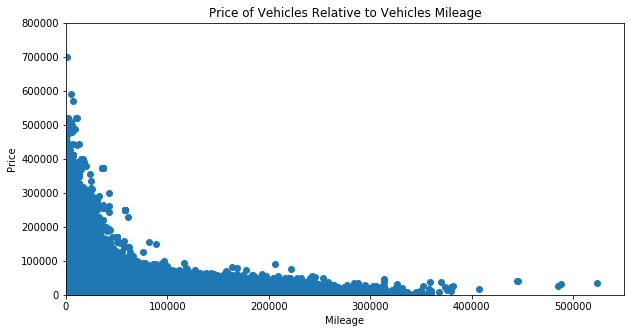

In [25]:
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(df.Mileage, df.Price)
plt.title('Price of Vehicles Relative to Vehicles Mileage')
plt.xlim(0, 550000)
plt.ylim(0, 800000)
plt.xlabel('Mileage')
plt.ylabel('Price')

([<matplotlib.axis.YTick at 0x7f64ef9eec18>,
 <a list of 25 Text yticklabel objects>)

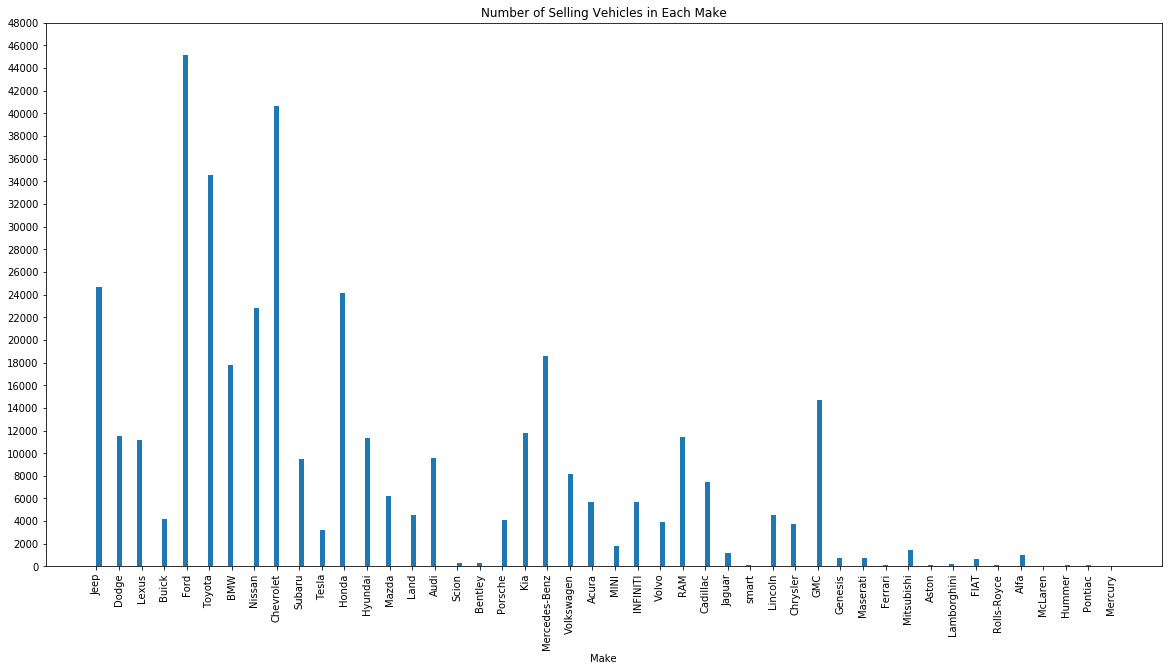

In [26]:
make = df['Make']
hist = make.hist(bins = 200, figsize = (20, 10), grid = False)
plt.title('Number of Selling Vehicles in Each Make')
plt.xlabel('Make')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,50000,2000))

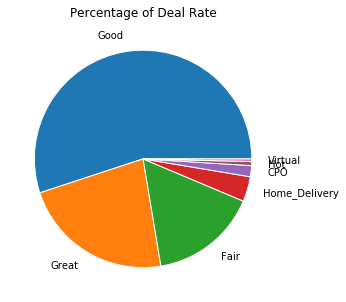

In [27]:
names='Good', 'Great', 'Fair', 'Home_Delivery', 'CPO', 'Hot', 'Virtual'
rate_num = [214604, 87950, 62499, 14472, 6412, 2291, 1557]
plt.rcParams["figure.figsize"] = (20,5)
plt.pie(rate_num, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Percentage of Deal Rate')
plt.show()

In [28]:
total = pd.DataFrame(df.groupby('State')['Rate'].count())
Great = df[df['Rate'] == 'Great']
Good = df[df['Rate'] == 'Good']
Hot = df[df['Rate'] == 'Hot']
Virtual = df[df['Rate'] == 'Virtual']
CPO = df[df['Rate'] == 'CPO']
Fair = df[df['Rate'] == 'Fair']
Home = df[df['Rate'] == 'Home_Delivery']

great = pd.DataFrame(Great.groupby('State')['Rate'].count())
great.columns = ['Great']
good = pd.DataFrame(Good.groupby('State')['Rate'].count())
good.columns = ['Good']
hot = pd.DataFrame(Hot.groupby('State')['Rate'].count())
hot.columns = ['Hot']
virtual = pd.DataFrame(Virtual.groupby('State')['Rate'].count())
virtual.columns = ['Virtual']
cpo = pd.DataFrame(CPO.groupby('State')['Rate'].count())
cpo.columns = ['CPO']
fair = pd.DataFrame(Fair.groupby('State')['Rate'].count())
fair.columns = ['Fair']
home = pd.DataFrame(Home.groupby('State')['Rate'].count())
home.columns = ['Home']

rate_count_state = pd.concat([total, great, good, hot, virtual, cpo, fair, home], axis=1)
rate_count = rate_count_state.replace(np.nan,0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



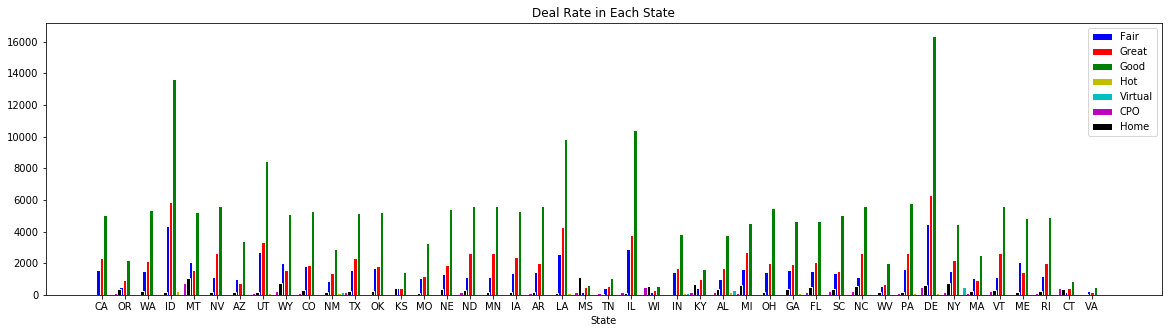

In [29]:
barWidth = 0.15

bars1 = np.array(rate_count.Fair)
bars2 = np.array(rate_count.Great)
bars3 = np.array(rate_count.Good)
bars4 = np.array(rate_count.Hot)
bars5 = np.array(rate_count.Virtual)
bars6 = np.array(rate_count.CPO)
bars7 = np.array(rate_count.Home)

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Fair')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Great')
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='Good')
plt.bar(r4, bars4, color='y', width=barWidth, edgecolor='white', label='Hot')
plt.bar(r5, bars5, color='c', width=barWidth, edgecolor='white', label='Virtual')
plt.bar(r6, bars6, color='m', width=barWidth, edgecolor='white', label='CPO')
plt.bar(r7, bars7, color='k', width=barWidth, edgecolor='white', label='Home')

plt.title('Deal Rate in Each State')
plt.xlabel('State')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CA', 'OR', 'WA', 'ID', 'MT', 'NV', 'AZ', 'UT', 'WY', 'CO', 'NM',
       'TX', 'OK', 'KS', 'MO', 'NE', 'ND', 'MN', 'IA', 'AR', 'LA', 'MS',
       'TN', 'IL', 'WI', 'IN', 'KY', 'AL', 'MI', 'OH', 'GA', 'FL', 'SC',
       'NC', 'WV', 'PA', 'DE', 'NY', 'MA', 'VT', 'ME', 'RI', 'CT', 'VA'])

plt.rcParams["figure.figsize"] = (30,10)
plt.legend()
plt.show()

In [30]:
df.head(50)

,index,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,Rate,Under_Value($),miles,electronic_dealer
0,0,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,Fair,0,0,0
1,1,2016,Dodge,Challenger SRT Hellcat,TRED Private Seller (San Diego),50,92132,CA,San Diego,29635,54099,Good,0,2,0
2,2,2010,Lexus,ES 350,TRED Private Seller (San Diego),50,92132,CA,San Diego,159000,8909,Great,1111,2,0
3,3,2020,Buick,Encore Essence,Hertz Car Sales San Diego,50,92132,CA,San Diego,57751,21353,Good,0,2,0
4,4,2015,Lexus,IS 350 Base,Shift San Diego,50,92132,CA,San Diego,55800,28950,Good,0,0,1
5,5,2019,Ford,Fiesta SE,Hertz Car Sales San Diego,50,92132,CA,San Diego,61323,14800,Good,0,2,0
6,6,2020,Buick,Encore Essence,Hertz Car Sales San Diego,50,92132,CA,San Diego,54304,22675,Great,229,2,0
7,7,2015,Toyota,Tundra TRD Pro,TRED Private Seller (San Diego),50,92132,CA,San Diego,59516,43079,Fair,0,2,0
8,8,2017,BMW,M3 Base,TRED Private Seller (San Diego),50,92132,CA,San Diego,29500,62999,Fair,0,2,0
9,9,2020,Nissan,Rogue Sport S,Hertz Car Sales San Diego,50,92132,CA,San Diego,56371,19739,Great,1236,2,0


Text(0, 0.5, 'Price')

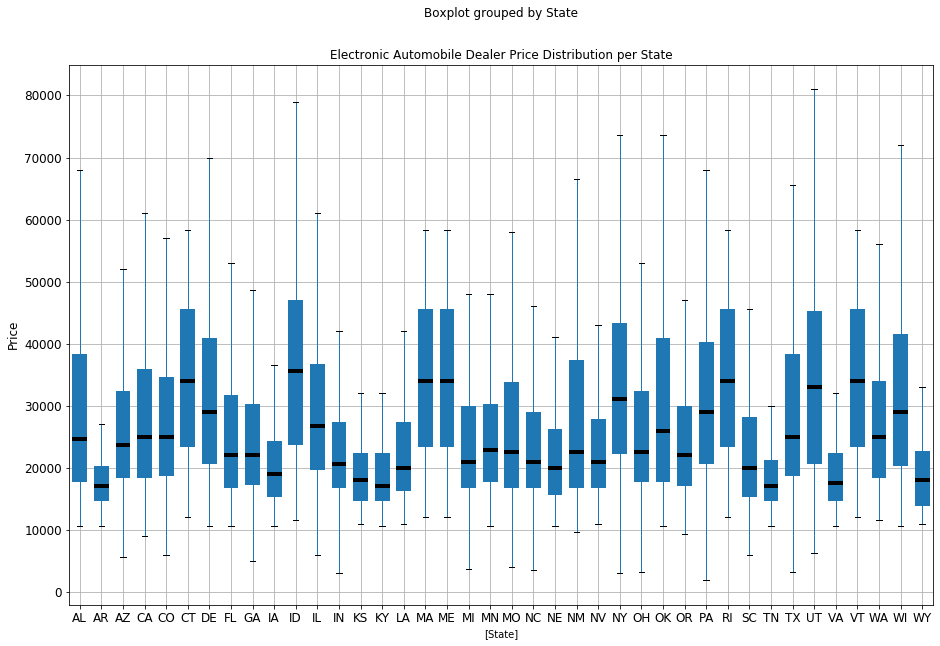

In [31]:
electric = df[df['electronic_dealer'] == 1] 
boxprops = dict(linestyle='-', linewidth=4, color='black')
medianprops = dict(linestyle='-', linewidth=4, color='black')

boxing = electric.boxplot(column=['Price'],by=['State'],figsize=(15,10),showfliers=False
                        ,fontsize=12,boxprops=boxprops,medianprops=medianprops 
                          ,return_type='dict',patch_artist=True)

[[item.set_color('k') for item in boxing[key]['medians']] for key in boxing.keys()]
plt.title('Electronic Automobile Dealer Price Distribution per State')
plt.ylabel('Price',fontsize=12)

Text(0, 0.5, 'Price')

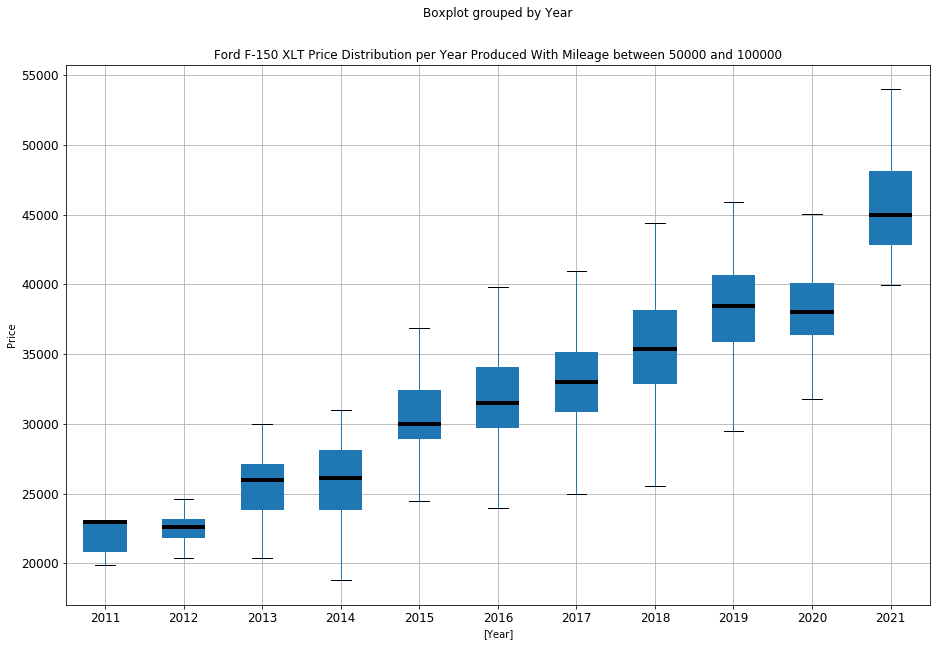

In [32]:
mileage_low = 50000
mileage_high = 100000
make = 'Ford'
model = 'F-150 XLT'
ford = df[(df['Make'] == make) & (df['Model'] == model) & ((df['Mileage']<=mileage_high)&(df['Mileage']>=mileage_low))] 

ford_boxing = ford.boxplot(column=['Price'],by=['Year'],figsize=(15,10),showfliers=False
                          ,fontsize=12,boxprops=boxprops,medianprops=medianprops 
                          ,return_type='dict',patch_artist=True)

[[item.set_color('k') for item in ford_boxing[key]['medians']] for key in ford_boxing.keys()]
plt.title(f'{make} {model} Price Distribution per Year Produced With Mileage between {mileage_low} and {mileage_high}')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

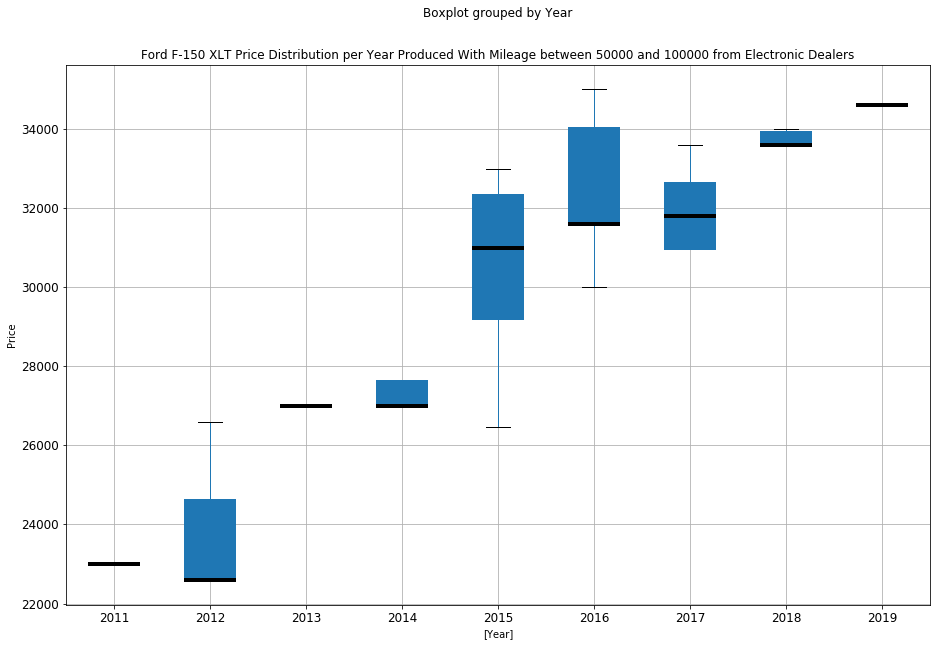

In [33]:
ford_e = ford[(ford['electronic_dealer'] == 1)] 

ford_boxing_e = ford_e.boxplot(column=['Price'],by=['Year'],figsize=(15,10),showfliers=False
                          ,fontsize=12,boxprops=boxprops,medianprops=medianprops 
                          ,return_type='dict',patch_artist=True)

[[item.set_color('k') for item in ford_boxing_e[key]['medians']] for key in ford_boxing_e.keys()]
plt.title(f'{make} {model} Price Distribution per Year Produced With Mileage between {mileage_low} and {mileage_high} from Electronic Dealers')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

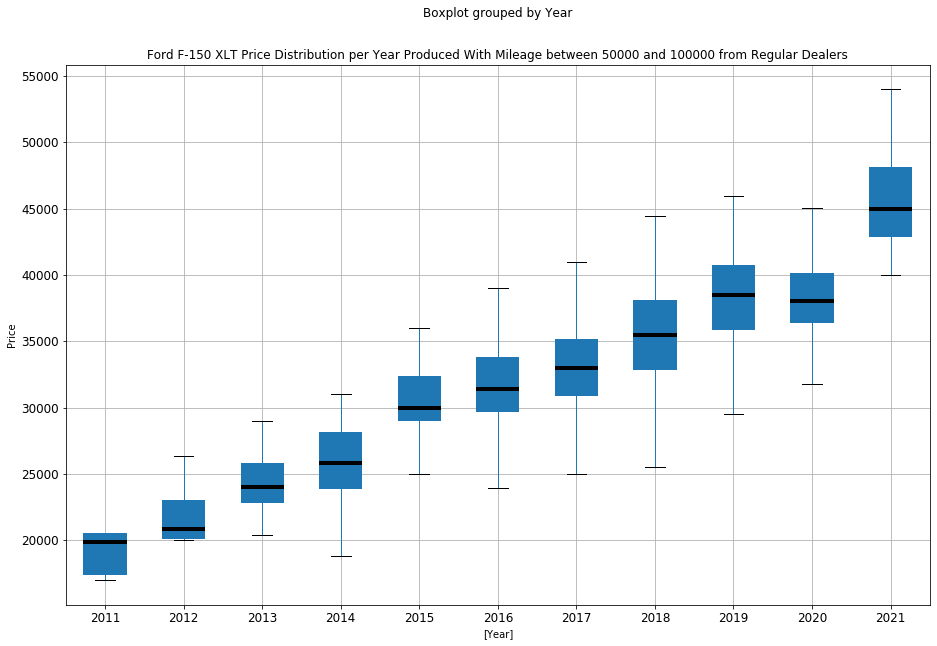

In [34]:
ford_r = ford[(ford['electronic_dealer'] == 0)] 

ford_boxing_r = ford_r.boxplot(column=['Price'],by=['Year'],figsize=(15,10),showfliers=False
                          ,fontsize=12,boxprops=boxprops,medianprops=medianprops 
                          ,return_type='dict',patch_artist=True)

[[item.set_color('k') for item in ford_boxing_r[key]['medians']] for key in ford_boxing_r.keys()]
plt.title(f'{make} {model} Price Distribution per Year Produced With Mileage between {mileage_low} and {mileage_high} from Regular Dealers')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

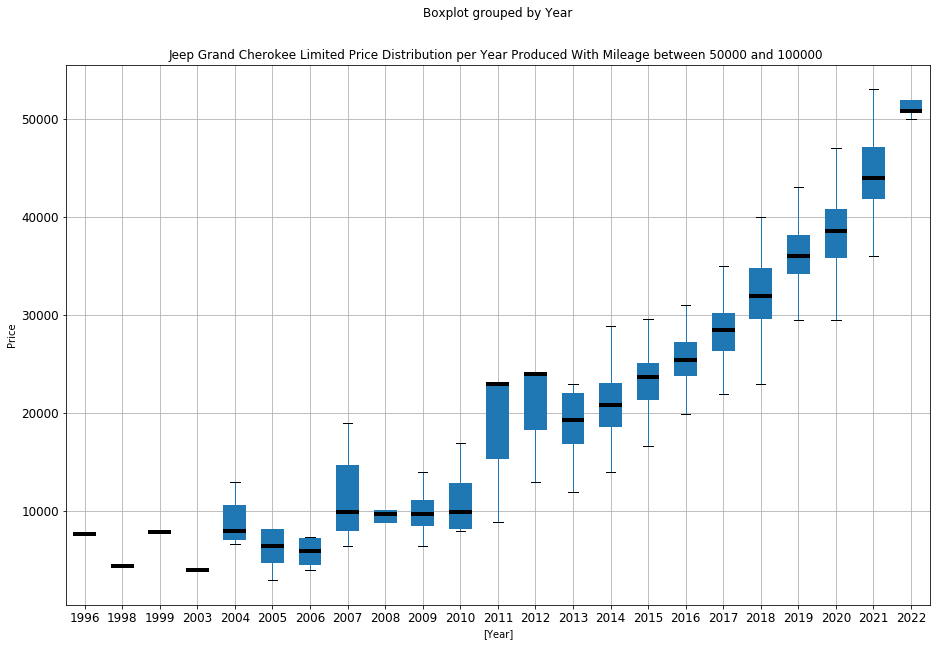

In [35]:
jeep_GC = df[df['Model'] == 'Grand Cherokee Limited'] 

mileage_low = 50000
mileage_high = 100000
make = 'Jeep'
model = 'Grand Cherokee Limited'

jeep_boxing = jeep_GC.boxplot(column=['Price'],by=['Year'],figsize=(15,10),showfliers=False
                          ,fontsize=12,boxprops=boxprops,medianprops=medianprops 
                          ,return_type='dict',patch_artist=True)

[[item.set_color('k') for item in jeep_boxing[key]['medians']] for key in jeep_boxing.keys()]
plt.title(f'{make} {model} Price Distribution per Year Produced With Mileage between {mileage_low} and {mileage_high} ')
plt.ylabel('Price')